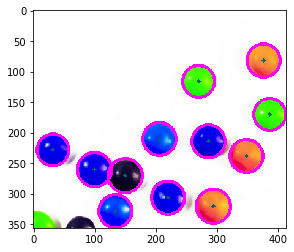

detecções: 12


In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

src = cv2.imread('smarties.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
    
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1 = 100, param2 = 30,
                               minRadius = 1, maxRadius = 30)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    center = (i[0], i[1])
    cv2.circle(src, center, 1, (0, 100, 100), 3)
    radius = i[2]
    cv2.circle(src, center, radius, (255, 0, 255), 3)
    
plt.imshow(src)
plt.show()

print('detecções:', circles.shape[1])

In [3]:
src = cv2.imread('smarties.png')
rs = [3.14 * (i[2]**2) for i in circles[0]]
coords = [[i[0], i[1]] for i in circles[0]]
scls = [src[i[1]][i[0]].tolist() for i in coords]
area_color = [i for i in zip(rs, scls)]

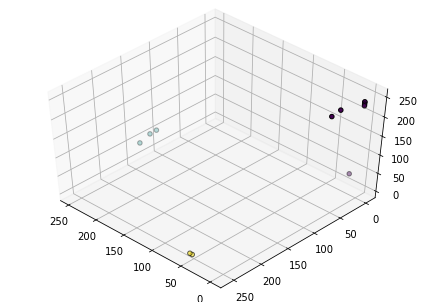

In [4]:
X = pd.DataFrame([i[1] for i in area_color])
est = KMeans(n_clusters = 3)

fig = plt.figure(figsize = (6, 4))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)
est.fit(X)
labels = est.labels_
ax.scatter(X[0], X[1], X[2], c = labels.astype(np.float), edgecolor = 'k')
plt.show()

In [5]:
clusters = est.predict(scls).tolist()
areas = []
rgbs = []
for i in area_color:
    areas.append(i[0])
    rgbs.append(i[1])
    
a = pd.Series(rgbs)
a.name = 'rgbs'
b = pd.Series(clusters)
b.name = 'cluster'
base_df = pd.Series(areas).to_frame()
df = base_df.merge(a, left_index = True, right_index = True).merge(b, left_index = True, right_index = True)

In [6]:
df

,0,rgbs,cluster
0,2289.06,"[247, 143, 52]",1
1,2289.06,"[247, 112, 63]",1
2,2461.76,"[247, 124, 62]",1
3,2289.06,"[0, 61, 248]",0
4,2122.64,"[48, 255, 0]",2
5,2289.06,"[0, 0, 238]",0
6,2122.64,"[52, 255, 0]",2
7,2122.64,"[0, 0, 239]",0
8,2461.76,"[0, 0, 233]",0
9,2289.06,"[0, 45, 252]",0
